In [10]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import imutils
import math

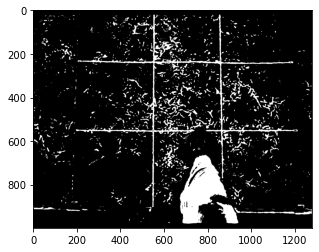

In [11]:
img = cv2.imread('transect.jpeg')
img_hsv = cv2.cvtColor(img , cv2.COLOR_BGR2HSV)
sharpen = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

bottom = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]]) # for horizontal lines 
#img_hsv = cv2.filter2D(img_hsv, -1, sharpen)
#img_hsv = cv2.filter2D(img_hsv, -1, bottom)
#img_hsv = cv2.Sobel(img_hsv,cv2.CV_64F,0,1,ksize=5)
#img_hsv = cv2.Sobel(img_hsv,cv2.CV_64F,0,1,ksize=5)
L = np.array([0,46,134], dtype=np.uint8)
U=np.array([187,153,214], dtype=np.uint8)
mask = cv2.inRange(img_hsv, L,U)
plt.imshow(mask,cmap='gray')


0.0
0.0
90.0
90.0
0.0
89.03803439918288
88.92774429572509
0.0
89.13847426543273
0.0
1.010997052330402
1.0544045035218386
0.0
69.9918953210854
1.227578832134544
65.14280323304307
90.0
90.0
1.169139327907419
0.0
90.0
1.005086005254181
63.90943718482918
90.0
70.06746343806049
83.90722834266393
63.034285567129864
84.87507665402096
70.16787014978162
45.0
70.12092564614215
90.0
1.177144885982063
57.76321344786977
69.89130012486582
65.0484877558032
82.0051352692367
84.8055710922652
83.29016319224307
85.97173633351485
1.0637251338913838
54.97205768733109
90.0
85.20320103316445
79.00749241973229
1.0207522076133313
73.01789354645459
60.147923730817325
85.07938396363602
77.93223104134667
58.72229713313355
64.09349200048563
83.79655209830817
84.2593933610481
84.10448298763066
64.10114879310515
78.8510103035582
82.87498365109819
82.13597520450045
84.10647076793492
82.12606186827438
71.86191784440268
79.07051199781962
80.20379008252549
80.96703030102891
70.87477397921292
82.87498365109819
70.9743939

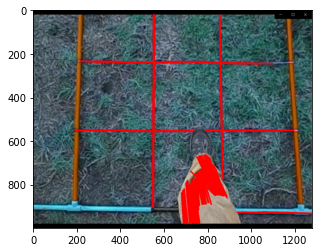

In [12]:
#getting lines in image 
rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 100
max_line_gap =5
img_copy = np.copy(img)
lines = cv2.HoughLinesP(mask, rho, theta, threshold, np.array([]),min_line_length, max_line_gap)
horizontal = []
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(img_copy,(x1,y1),(x2,y2),(255,0,0),5)
        #horizontal lines
        Angle = math.atan2(abs(y2 - y1), abs(x2 - x1)) * 180.0 / np.pi;
        print (Angle)
        if (Angle >= 0 and Angle<=10 ):
            horizontal.append([[x1,y1,x2,y2]])
        
plt.imshow(img_copy)


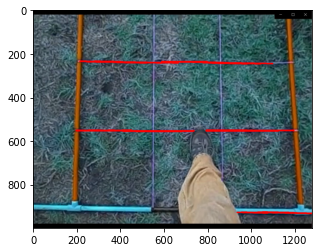

In [13]:
img_copy2 = np.copy(img)
for line in horizontal:
    for x1,y1,x2,y2 in line:
        cv2.line(img_copy2,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(img_copy2)      

In [17]:
# sort lines and get only 2 lines 
filtered_lines=[]
sort=sorted(horizontal,key=lambda l:l[0][1], reverse=True)

# error in this loop 
for i in range(len(sort)):
    if ((sort[i][0][1] - sort[i-1][0][1]))>20: # compare y in the current line and next one 
        filtered_lines.append(sort[i])
        
        print(True)
    


[[[1131, 929, 1278, 932]], [[1145, 928, 1278, 931]], [[936, 927, 1076, 930]], [[1030, 926, 1144, 928]], [[955, 926, 1123, 929]], [[1052, 925, 1198, 928]], [[471, 556, 683, 556]], [[412, 555, 735, 555]], [[794, 554, 1125, 554]], [[222, 553, 739, 553]], [[199, 553, 374, 550]], [[793, 552, 1196, 552]], [[281, 552, 452, 550]], [[795, 551, 1196, 551]], [[197, 551, 309, 550]], [[796, 550, 982, 550]], [[821, 243, 984, 246]], [[779, 241, 1044, 246]], [[384, 240, 522, 242]], [[661, 237, 874, 240]], [[248, 237, 406, 239]], [[589, 236, 1099, 245]], [[595, 236, 799, 236]], [[215, 235, 592, 242]], [[217, 234, 666, 242]], [[279, 234, 401, 236]]]


In [15]:
filtered_lines

[[[1131, 929, 1278, 932]]]

In [16]:
rows = []

y = img.shape[0]
for line in filtered_lines:
    for x1,y1,x2,y2 in line:
        y_avg=(y1+y2)/2
        if (abs(y-y_avg)>100):
            crop= img[int(y):int(y_avg), :]
            rows.append(crop)
            y= y_avg
            print(True)